# Overview
### (English)

#### In this Notebook, I will create a ML model (Machine Learning) to predict the price of boarding houses based on the features in the data that I previously obtained from the mamikos.com website.
#### I will use the SVM (Support Vector Machine) algorithm for this project.

# Ringkasan
### (Bahasa Indonesia)

#### Dalam Notebook ini, saya akan membuat model ML (Machine Learning) untuk memprediksi harga dari kos berdasarkan fitur yang ada dalam data yang saya peproleh dari web mamikos.com sebelumnya.
#### Saya akan menggunakan algoritma SVM (Support Vector Machine) untuk project kal ini.

In [1]:
# import common package
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
data = pd.read_csv('data/data_kos_malang_clean.csv')
data.head(10)

,Nama Kos,Lokasi,Fasilitas,Ratings,Harga per Bulan
0,Kost Wisma Kencana Hidayah,Lowokwaru,"WiFi, Kasur, Akses 24 Jam",4.1,600000
1,Kost Omah Tipe 1,Lowokwaru,"K. Mandi Dalam, WiFi, Kloset Duduk, Kasur, Aks...",NaN,950000
2,Kost Graha Kamila Tipe Standar,Lowokwaru,"WiFi, Kloset Duduk, Kasur, Akses 24 Jam",NaN,1000000
3,Kost Semanggi,Lowokwaru,Kasur,NaN,500000
4,Kost CM6,Lowokwaru,"WiFi, Kasur, Akses 24 Jam",NaN,950000
5,Kost Cozy Dozy 1 Tipe A,Lowokwaru,"WiFi, Kasur, Akses 24 Jam",4.9,500000
6,Kost Putra Cantewa Tipe B,Lowokwaru,"K. Mandi Dalam, WiFi, Kasur, Akses 24 Jam",NaN,850000
7,Kost Bangkit Boarding House Tipe A,Lowokwaru,"WiFi, Kasur, Akses 24 Jam",NaN,650000
8,Kost Bantaran IIID,Lowokwaru,"WiFi, Kasur, Akses 24 Jam",5.0,550000
9,Kost Basecamp,Blimbing,"K. Mandi Dalam, WiFi, Kasur, Akses 24 Jam",4.1,680000


## Check Data
#### Check for missing/empty data & delete columns that are not needed. Delete columns that have a lot of missing data, and category columns that have a lot of unique values ​​because the feature cannot do this

## Cek Data
#### Cek data bolong / kosong & hapus kolom yang tidak diperlukan. Hapus kolom yang memiliki banyak data hilang, dan kolom categori yang memiliki banyak value unik karena tidak dapat dilakukan fitur

In [3]:
# check missing value
data.isna().mean()

Nama Kos           0.000000
Lokasi             0.000000
Fasilitas          0.000000
Ratings            0.829167
Harga per Bulan    0.000000
dtype: float64

In [4]:
# drop colum Ratings
data.drop(['Nama Kos','Ratings'], axis=1, inplace=True)

## Data Splitting
#### After loading the data, the next step is to separate our data into 2 parts, namely training and testing data, training data is used to train our model and testing data is used to make experimental predictions for our model.

## Data Spliting 
#### Setelah load data langkah selanjutnya, kita memisah data kita menjadi 2 bagian yaitu data training dan testing, data training digunakan untuk melatih model kita dan data testing digunakan untuk membuat prediksi percobaan untuk model kita.

In [5]:
# define features (X) and label (y)
X = data.drop('Harga per Bulan', axis=1)
y = data['Harga per Bulan']

In [6]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.25,
                                                   random_state=42)
X_train.shape, y_train.shape

((180, 2), (180,))

## Processing & Modeling Data
#### The next step is processing the data, giving numerical labels to the data, scaling the data, etc. which we will wrap in a pipeline so that it can be used for processing test data and avoiding data leaks.
#### and also includes the SVM algorithm (regression task) then tuning the parameters and finally checking the score to be used as a measurement for the next model improvisation. r can be used for processing test data and avoiding data leakage.

## Memproses & Memodelkan Data
#### Step selanjutnya adalah memproses data, memberikan label numeric kepada data, menskalakan data dll yang akan kita bungkus dalam pipeline agar bisa digunakan untuk pemrosesan data test dan menghindari kebocoran data (data leakage).
#### dan juga menyertakan algoritma SVM (regression task)  lalu tuning parameter dan yang terakhir cek score untuk dijadikan pengukuran atas improvisasi model berikutnya.

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.svm import SVR

In [8]:
# check unique data facilities
unique_facility = []
for f in data['Fasilitas']:
    d = f.split(', ')
    
    for i in d:
        if i in unique_facility:
            continue
        else:
            unique_facility.append(i)

In [9]:
# check unique
unique_facility

['WiFi', 'Kasur', 'Akses 24 Jam', 'K. Mandi Dalam', 'Kloset Duduk', 'AC']

In [10]:
# get facilities

def get_facilities(DATA):
    
    # list for new unique value
    wifi = []
    kasur = []
    akses = []
    KMD = []
    KD = []
    AC = []

    D = DATA.copy(deep=True) # copy dataframe
    
    # looping for index in colum of dataframe
    for d in D['Fasilitas']:
        L = d.split(', ') # split value
        
        for uf,new in zip(unique_facility,[wifi, kasur, akses, KMD, KD, AC]):
            if uf in L:
                new.append(1)
            else:
                new.append(0)
    
    D.drop('Fasilitas', axis=1, inplace=True)
    new_df = pd.DataFrame({
        'Wifi': wifi,
        'Kasur': kasur,
        'Akses 24 Jam': akses,
        'K. Mandi Dalam': KMD,
        'Kloset Duduk': KD,
        'AC': AC
    })
    
    # suitable index
    new_df.index = D.index
    
    return pd.concat([D, new_df], axis=1)

In [11]:
# check function
a = get_facilities(data)
a.head()

,Lokasi,Harga per Bulan,Wifi,Kasur,Akses 24 Jam,K. Mandi Dalam,Kloset Duduk,AC
0,Lowokwaru,600000,1,1,1,0,0,0
1,Lowokwaru,950000,1,1,1,1,1,0
2,Lowokwaru,1000000,1,1,1,0,1,0
3,Lowokwaru,500000,0,1,0,0,0,0
4,Lowokwaru,950000,1,1,1,0,0,0


In [12]:
data.head()

,Lokasi,Fasilitas,Harga per Bulan
0,Lowokwaru,"WiFi, Kasur, Akses 24 Jam",600000
1,Lowokwaru,"K. Mandi Dalam, WiFi, Kloset Duduk, Kasur, Aks...",950000
2,Lowokwaru,"WiFi, Kloset Duduk, Kasur, Akses 24 Jam",1000000
3,Lowokwaru,Kasur,500000
4,Lowokwaru,"WiFi, Kasur, Akses 24 Jam",950000


In [13]:
# data processing pipeline

prep = Pipeline([
    ('split_facilities', FunctionTransformer(get_facilities)),
    ('labeling', ColumnTransformer([
        ('label',OneHotEncoder(sparse=False),['Lokasi'])
    ], remainder='passthrough')),
    ('scaling' , MinMaxScaler())
])

In [14]:
# check processing pipeline
prep.fit_transform(X_train).shape

(180, 10)

In [15]:
param_grid = {
    'algo__kernel': ['linear', 'rbf', 'poly'],
    'algo__C': [0.1, 1, 10, 100],
    'algo__gamma': ['scale', 'auto'],
    'algo__epsilon': [0.1, 0.2, 0.5]
}

# pipeline model
pipeline = Pipeline([
    ('prep', prep),
    ('algo', SVR())
])

In [16]:
# tuning
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('prep',
                                        Pipeline(steps=[('split_facilities',
                                                         FunctionTransformer(func=<function get_facilities at 0x000002062DF9E3E0>)),
                                                        ('labeling',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('label',
                                                                                          OneHotEncoder(sparse=False),
                                                                                          ['Lokasi'])])),
                                                        ('scaling',
                                                         MinMaxScaler())])),
                                       ('algo', SVR())]),
             n_jobs=-1,
             param_grid={'algo__C': [0.1, 1, 10, 100],
                         'algo__epsilon': [0.1, 0.2, 0.5],
                         'algo__gamma': ['scale', 'auto'],
                         'algo__kernel': ['linear', 'rbf', 'poly']},
             scoring='neg_mean_squared_error', verbose=1)

## Evaluation Model
#### View the best parameters & evaluate the model using "Mean Squared Error".

## Evaluasi Model
#### Melihat parameter terbaik & mengevaluasi model menggunakan "Mean Squared Error".

In [17]:
# evaluate data
print(f'best param : {model.best_params_}')
print(f'Validation : {model.score(X_train, y_train)}')
print(f'Testing : {model.score(X_test, y_test)}')

best param : {'algo__C': 100, 'algo__epsilon': 0.1, 'algo__gamma': 'scale', 'algo__kernel': 'poly'}
Validation : -27185700983.180664
Testing : -22849923253.397713


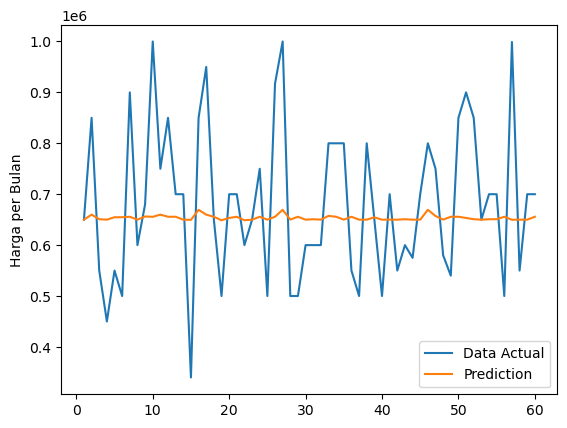

In [18]:
# visualisation model prediction & actual data.
import matplotlib.pyplot as plt
import seaborn as sns

# make prediction
y_pred = model.predict(X_test)

sns.lineplot(x=range(1,len(X_test)+1), y=y_test, label='Data Actual')
sns.lineplot(x=range(1,len(X_test)+1), y=y_pred, label='Prediction')
plt.legend()
plt.show()

## Save Model & Data

#### Save model with svm.pkl and train.csv for data 

## Menyimpan Model & Data

#### Menyimpan model menggunakan svm.pkl dan train.csv untuk data

In [19]:
# save model
import pickle

with open('model/svm_regression.pkl','wb') as file:
    pickle.dump(model.best_params_, file)

In [20]:
# save data
X_train.to_csv('data/train.csv')

# Conclusion
#### The model is very bad, I will make an EDA from the train data in the next step and will improve the model through the information I get later.

# Kesimpulan
#### Model sangat buruk, saya akan membuat EDA dari data train pada step selanjutnya dan akan improve model melalui informasi informasi yang saya dapatkan nantinya.